#Regresión

## Regresión Lineal

Los modelos de clasificación por regresión mapea las entradas a un valor continuo, por ejemplo un entero. La finalidad de un modelo de regresión es predecir un valor numérico.


### Características


Son parte de los datasets, los cuales han sido identificados importantes para determinar un resultado preciso. 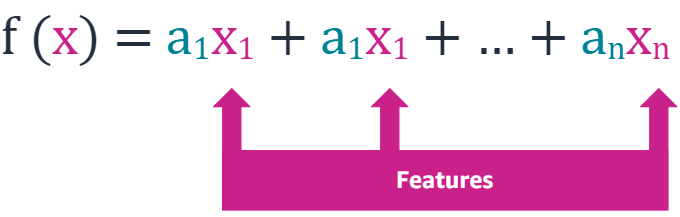



El peso representa que tan importante es la característica asociada para determinar la precisión del resultado. Algo que parece que puede tener la mayor precisión, tiene mayor peso y viceversa.
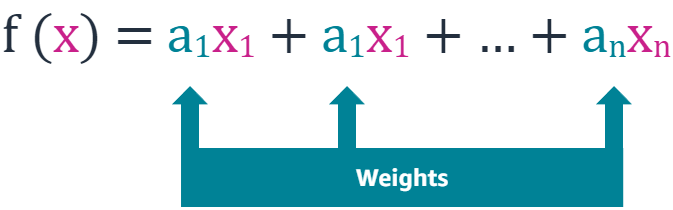

#### Ejemplo en la vida Real


##### Los investigadores médicos suelen utilizar la regresión lineal para comprender la relación entre la dosis de un fármaco y la tensión arterial de los pacientes. Por ejemplo, los investigadores pueden administrar varias dosis de un determinado fármaco a los pacientes y observar cómo responde su tensión arterial.


#### Podrían ajustar un modelo de regresión lineal simple utilizando la dosis como variable predictora y la tensión arterial como variable de respuesta. El modelo de regresión tendría la siguiente forma
$$ presion arterial = β_0 + β_1(dosis) $$


*   El coeficiente β0 representaría la presión arterial esperada cuando la dosis es cero.
*   El coeficiente β1 representaría el cambio medio en la presión arterial cuando la dosis se incrementa en una unidad.

*   Si β1 es negativo, significaría que un aumento de la dosis se asocia a una disminución de la presión arterial.

*   Si β1 es cercano a cero, significaría que un aumento de la dosis no se asocia a ningún cambio en la presión arterial.

*   Si β1 es positivo, significaría que un aumento de la dosis se asocia a un aumento de la presión arterial.


En función del valor de β1, los investigadores pueden decidir cambiar la dosis administrada a un paciente.



In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
# Generamos nuestros datos
np.random.seed(0)
dosis = np.random.rand(50) * 10
presion_sangre = 120 - 5 * dosis + np.random.randn(50) * 2


In [3]:
# Crea un DataFrame para trabajar con los datos:
data = pd.DataFrame({'Dosis': dosis, 'PresionSangre': presion_sangre})

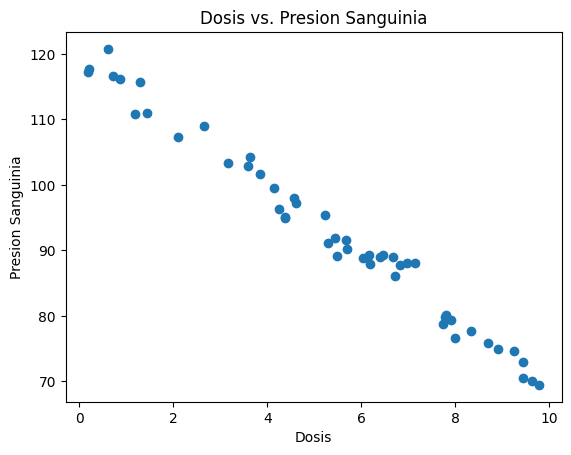

In [4]:
# Visualizamos la informacion
plt.scatter(data['Dosis'], data['PresionSangre'])
plt.xlabel('Dosis')
plt.ylabel('Presion Sanguinia')
plt.title('Dosis vs. Presion Sanguinia')
plt.show()


Interpreta los coeficientes:


*   β0 representa la presión arterial esperada cuando la dosis es cero.
*   β1 representa el cambio promedio en la presión arterial cuando la dosis se incrementa en una unidad.
*   Si β1 es negativo, indica una disminución en la presión arterial por cada unidad de aumento en la dosis.
*   Si β1 es positivo, indica un aumento en la presión arterial por cada unidad de aumento en la dosis.



In [5]:
# Ajusta el modelo de regresión lineal:
X = data[['Dosis']] # Variable predictora
y = data['PresionSangre']  # Variable de respuesta

# Crea y ajusta el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)
beta0 = model.intercept_
beta1 = model.coef_[0]

print(f'Intercept (β0): {beta0}')
print(f'Slope (β1): {beta1}')



Intercept (β0): 119.98557983173946
Slope (β1): -5.061453410538097


In [6]:
# Realizar predicciones para la visualización
x_values = np.linspace(0, 10, 100)  #  Generar 100 puntos para el eje x
y_values = beta0 + beta1 * x_values

# Predecir la presión sanguínea para nuevas dosis
new_dosage = np.array([2, 4, 6])
predicted_blood_pressure = model.predict(new_dosage.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


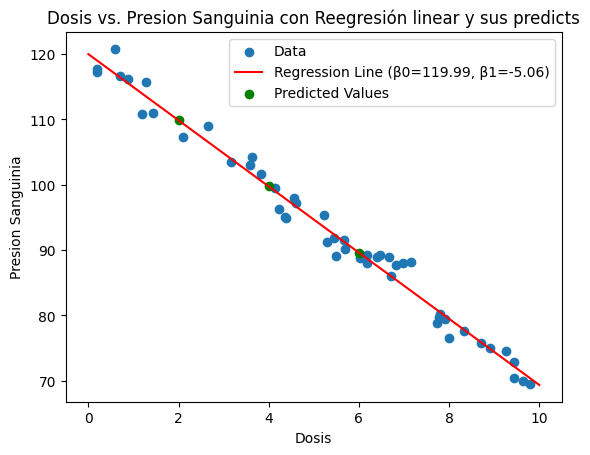

In [7]:
# Plot the data points, regression line, and predicted values
plt.scatter(data['Dosis'], data['PresionSangre'], label='Data')
plt.plot(x_values, y_values, color='red', label=f'Regression Line (β0={beta0:.2f}, β1={beta1:.2f})')
plt.scatter(new_dosage, predicted_blood_pressure, color='green', marker='o', label='Predicted Values')
plt.xlabel('Dosis')
plt.ylabel('Presion Sanguinia')
plt.title('Dosis vs. Presion Sanguinia con Reegresión linear y sus predicts')
plt.legend()
plt.show()


In [8]:
print('Predición de Presion Sanguinia:')
for d, bp in zip(new_dosage, predicted_blood_pressure):
    print(f'Dosis: {d} - Predición de Presion Sanguinia: {bp}')

Predición de Presion Sanguinia:
Dosis: 2 - Predición de Presion Sanguinia: 109.86267301066326
Dosis: 4 - Predición de Presion Sanguinia: 99.73976618958707
Dosis: 6 - Predición de Presion Sanguinia: 89.61685936851087
